
### Heart Disease Prediction: End-to-End Machine Learning Project  

This notebook is a comprehensive guide to building a machine learning model to predict the likelihood of heart disease using clinical data. By leveraging Python and popular data science libraries, we'll systematically address each step in the process.

---

### **Roadmap**  
1. **Understanding the Problem**: Defining the goal and framing the challenge.  
2. **Data Preprocessing**: Cleaning and preparing the raw dataset for analysis.  
3. **Evaluation**: Setting performance benchmarks to measure model success.  
4. **Feature Exploration**: Investigating key variables and their relevance to the prediction task.  
5. **Modeling**: Training, testing, and refining machine learning models.  
6. **Experimentation**: Testing alternative approaches to optimize performance.  

---

### **1. Problem Definition**  
The task is to predict whether a patient has heart disease based on their clinical health parameters. This involves analyzing various health metrics to create a reliable prediction system.  

**Objective Statement**:  
Given a set of clinical parameters about a patient, determine whether they are likely to have heart disease (`yes` or `no`).  

---

### **2. Data Source**  
The dataset is sourced from the **UCI Machine Learning Repository**, a well-known repository for machine learning datasets.  

---

### **3. Evaluation Metric**  
The project will be considered successful if:  
- **Proof of Concept**: Achieving at least **80% accuracy** during the initial model evaluation phase.  

---

### **4. Features**  
Here’s a breakdown of the dataset’s features and their roles:  

| Variable Name | Role        | Type         | Description                                                | Units      | Missing Values |
|---------------|-------------|--------------|------------------------------------------------------------|------------|----------------|
| **age**       | Feature     | Integer      | Age of the patient                                         | years      | No             |
| **sex**       | Feature     | Categorical  | Sex of the patient                                         | -          | No             |
| **cp**        | Feature     | Categorical  | Chest pain type                                            | -          | No             |
| **trestbps**  | Feature     | Integer      | Resting blood pressure (on hospital admission)            | mm Hg      | No             |
| **chol**      | Feature     | Integer      | Serum cholesterol level                                    | mg/dl      | No             |
| **fbs**       | Feature     | Categorical  | Fasting blood sugar > 120 mg/dl                            | -          | No             |
| **restecg**   | Feature     | Categorical  | Resting electrocardiographic results                      | -          | No             |
| **thalach**   | Feature     | Integer      | Maximum heart rate achieved                                | -          | No             |
| **exang**     | Feature     | Categorical  | Exercise-induced angina                                    | -          | No             |
| **oldpeak**   | Feature     | Float        | ST depression induced by exercise relative to rest         | -          | No             |
| **slope**     | Feature     | Categorical  | Slope of the peak exercise ST segment                     | -          | No             |
| **ca**        | Feature     | Integer      | Number of major vessels (0–3) colored by fluoroscopy       | -          | Yes            |
| **thal**      | Feature     | Categorical  | Thalassemia (blood disorder)                               | -          | Yes            |
| **num**       | Target      | Integer      | Indicates presence of heart disease (1 = yes, 0 = no)      | -          | No             |  

--- 





## Preparing the tools

Using Pandas, NUmpy and Matplotlib for Data Manipulation and Analysis

In [5]:
# import all tools the tools we need

# Regular EDA and plotting libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 

# Models from Scikit-Learn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

## Load the Data 

In [6]:
df = pd.read_csv('data/heart-disease.csv')
df.shape #(rows,cols)

(303, 14)

## Exploratory Data Analysis (EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset your working with.

1. What questions are you trying to solve?
2. what kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it ?
4. Where are the outliers and why should you care about them?

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

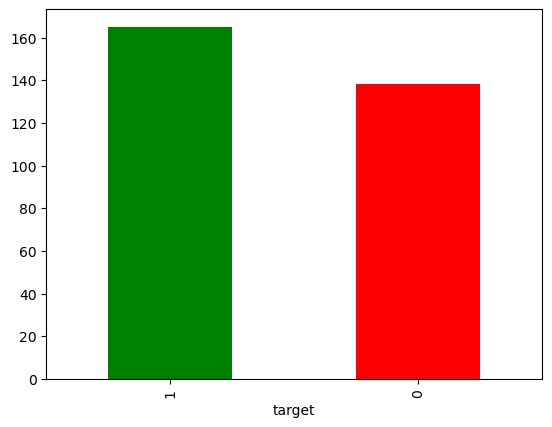

In [12]:
df["target"].value_counts().plot(kind="bar",color=["green","red"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency According to Sex 

In [17]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

### Compare target column with sex column 

In [19]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


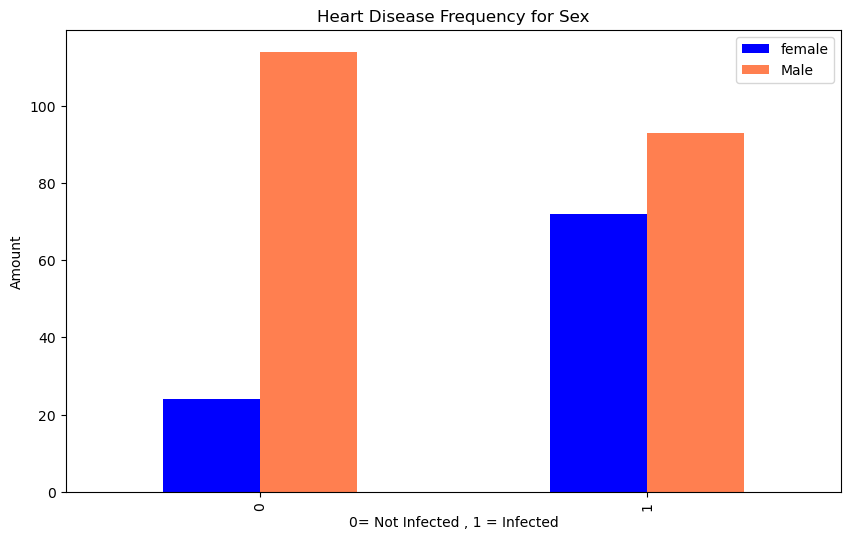

In [25]:
pd.crosstab(df.target,df.sex).plot(kind ="bar",figsize=(10,6),color=["blue","coral"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0= Not Infected , 1 = Infected")
plt.ylabel("Amount")
plt.legend(["female","Male"]);